In [27]:
from pylab import *
from classy import *

## Iris

In [2]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.2)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


In [3]:
C=Perceptron()

In [4]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print "Training time: ",timeit()

Time Reset
Training time:  0.0022280216217 seconds 


In [5]:
print "On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)
print "On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)

On Training Set: 66.6666666667
On Test Set: 73.3333333333


In [6]:
C=BackProp(hidden_layer_sizes = [4])

In [7]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print "Training time: ",timeit()

Time Reset
Training time:  0.039783000946 seconds 


In [8]:
data_train.vectors.shape,data_train.targets.shape

((120, 4), (120,))

In [9]:
print "On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)
print "On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)

On Training Set: 100.0
On Test Set: 90.0


## XOR Problem - Perceptron

In [10]:
data=load_csv('data/xor.csv')
print 
print data.vectors
print 
print data.targets

4 vectors of length 2
Feature names: 'p1', 'p2'
Target values given.
Target names: '0', '1'
Mean:  [ 0.5  0.5]
Median:  [ 0.5  0.5]
Stddev:  [ 0.5  0.5]

[[ 0.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  1.]]

[0 1 1 0]


In [11]:
C=Perceptron()

In [12]:
C.fit(data.vectors,data.targets)

In [13]:
print C.predict(data.vectors)

[0 0 0 0]


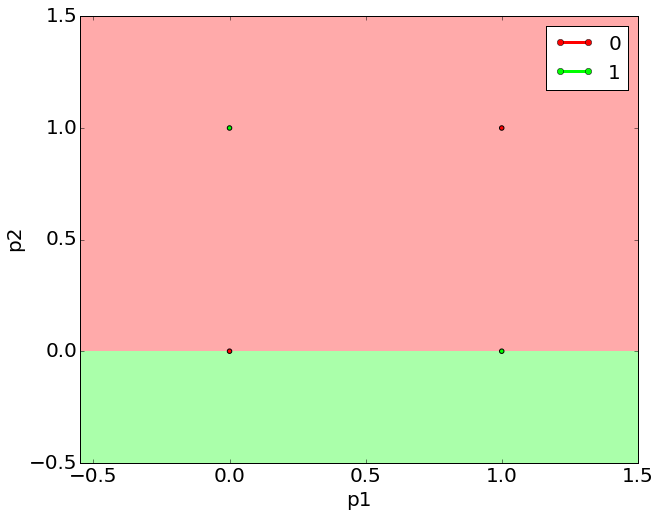

In [14]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

## XOR Problem - Backprop

In [15]:
data.vectors

array([[ 0.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  1.]])

In [16]:
data.targets

array([0, 1, 1, 0])

In [17]:
C=BackProp(hidden_layer_sizes = [4])

In [18]:
C.fit(data.vectors,data.targets)

In [19]:
print C.predict(data.vectors)

[0 0 1 0]


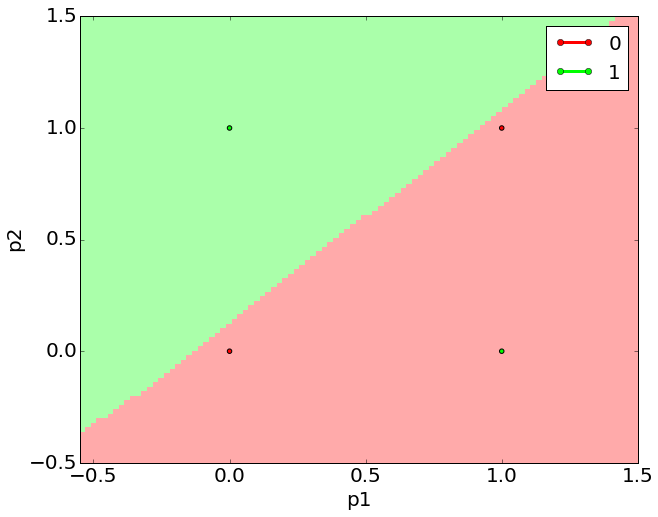

In [20]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

In [21]:
print data.vectors
print
print data.targets

[[ 0.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  1.]]

[0 1 1 0]


In [22]:
C._decision_scores(data.vectors)

array([[-0.43613072],
       [-0.43613072],
       [ 4.30553723],
       [-0.43613072]])

In [23]:
h,y=C.output(data.vectors)
print h
print 
print np.round(h)
print
print y

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.10683738e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.46300341e-11   0.00000000e+00   0.00000000e+00   0.00000000e+00]]

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 2.  0.  0.  0.]
 [ 0.  0.  0.  0.]]

[[-0.43613072]
 [-0.43613072]
 [ 4.30553723]
 [-0.43613072]]


In [25]:
C.layers_coef_

[array([[-2.10683738, -0.30855845, -0.05762151, -0.96475139],
        [ 2.17750363,  0.13939509, -0.40907126, -0.8067147 ]]),
 array([[ 2.25060937],
        [ 0.91305113],
        [-0.8001509 ],
        [-0.53812764]])]

## 8x8

In [28]:
vectors=eye(8)
targets=arange(1,9)
print vectors,targets

[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]] [1 2 3 4 5 6 7 8]


In [49]:
C=BackProp(activation='logistic',hidden_layer_sizes = [3],tol=1e-11)
C.fit(vectors,targets)
print C.predict(vectors)

[1 2 3 4 5 6 7 8]


In [50]:
h,y=C.output(vectors)

In [51]:
h

array([[ 0.98028837,  0.53718872,  0.94754228],
       [ 0.06632407,  0.14088125,  0.99175244],
       [ 0.98106474,  0.01631513,  0.08443235],
       [ 0.02189428,  0.9928875 ,  0.27776584],
       [ 0.20911644,  0.46632044,  0.01108817],
       [ 0.02053642,  0.00626818,  0.35395161],
       [ 0.12184242,  0.96795622,  0.99337598],
       [ 0.97778235,  0.96748026,  0.06883888]])

In [52]:
h.round()

array([[ 1.,  1.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  1.,  1.],
       [ 1.,  1.,  0.]])

In [53]:
y.round()

array([[ 11.,   3.,   3.,  -7., -10.,  -8.,   4.,   4.],
       [  4.,  12.,  -2.,  -7.,  -7.,   5.,   4.,  -9.],
       [  5.,  -6.,  12., -11.,   5.,   3., -12.,   4.],
       [ -1.,  -6.,  -7.,  10.,   4.,  -6.,   4.,   2.],
       [ -2.,  -6.,   1.,   2.,   8.,   2.,  -6.,   1.],
       [ -1.,   3.,   2.,  -5.,   4.,  10.,  -5.,  -6.],
       [  4.,   5., -10.,   6.,  -8.,  -8.,  12.,  -1.],
       [  5., -13.,   3.,   4.,   4., -12.,  -3.,  12.]])

In [54]:
C.predict(vectors)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [55]:
y.shape

(8, 8)

<matplotlib.colorbar.Colorbar instance at 0x10c437a28>

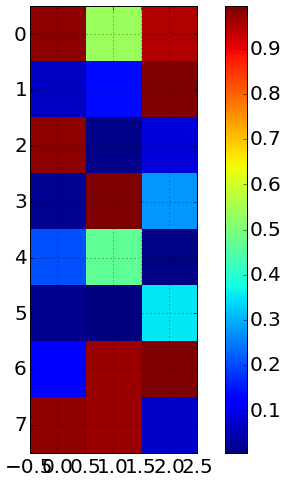

In [56]:
imshow(h,interpolation='nearest')
colorbar()

In [57]:
weights_xh,weights_hy=C.layers_coef_

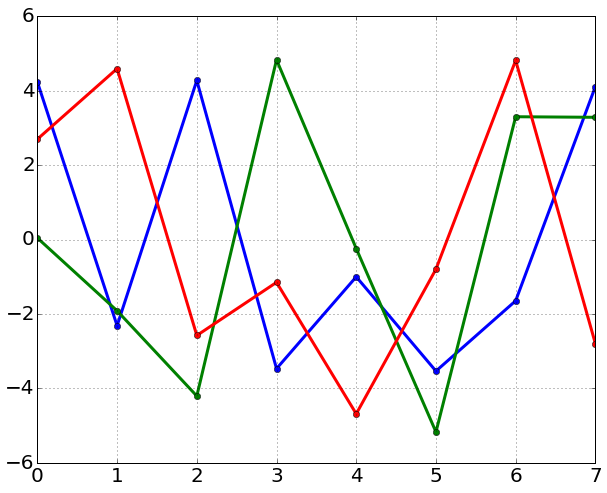

In [59]:
plot(weights_xh,'-o')

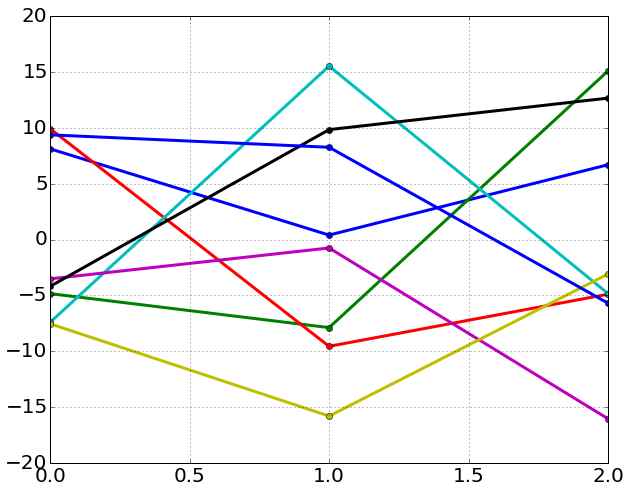

In [60]:
plot(weights_hy,'-o')

## Tuning the number of hidden units

In [72]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.75)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (37, 4)
Test vector shape:  (113, 4)


select which number of hidden units to use

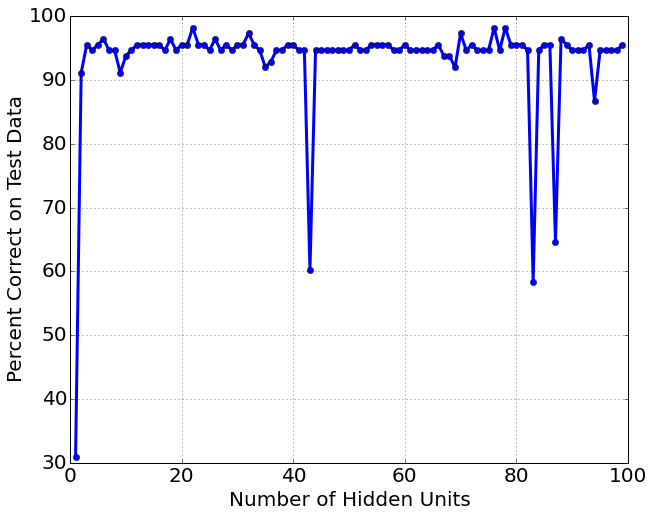

In [73]:
hidden=range(1,100)
percent_correct=[]
for n in hidden:
    C=BackProp(hidden_layer_sizes = [n])
    C.fit(data_train.vectors,data_train.targets)
    percent_correct.append(C.percent_correct(data_test.vectors,data_test.targets))
    
plot(hidden,percent_correct,'-o')
xlabel('Number of Hidden Units')
ylabel('Percent Correct on Test Data')